## Семинар 10. Линейная регрессия (часть 1).

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
from statsmodels.regression.linear_model import OLS

In [3]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_goldfeldquandt

### Задача №1

В файле "Carseats.csv" представлены данные о продажах детских кресел в различных магазинах страны:

Sales – количество проданных кресел

Advertising – бюджет, выделенный на рекламу 

Price – цена 

CompPrice - цена основного конкурента 

Age – средний возраст населения 


Охарактеризовать линейную зависимость продаж кресел от всех перечисленных выше показателей.

In [4]:
data = pd.read_csv('Carseats.csv') 

In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,11.271,138,73,11,276,120,Bad,42,17,Yes,Yes
1,10.706,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.110,113,35,10,269,80,Medium,59,12,Yes,Yes
3,9.062,117,100,4,466,97,Medium,55,14,Yes,Yes
4,7.244,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
x = add_constant(data[['CompPrice', 'Advertising', 'Price', 'Age']])
y = data['Sales']
#add constant: добавляем в x (и в регрессию) константу, итого у нас теперь k=5 факторов, один из них равен 1

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
x.head()

,const,CompPrice,Advertising,Price,Age
0,1.0,138,11,120,42
1,1.0,111,16,83,65
2,1.0,113,10,80,59
3,1.0,117,4,97,55
4,1.0,141,3,128,38


Строим линейную регрессию y по x:

In [7]:
ols = OLS(y, x)
results = ols.fit()

Теперь в results хранится много полезной информации о построенной модели линейной регрессии.

Чтобы посмотреть, что есть в results, набираем "results." и нажимаем TAB.

In [ ]:
results.

#### Оценки параметров регрессии

In [22]:
results.params

const          7.952214
CompPrice      0.096331
Advertising    0.144455
Price         -0.095103
Age           -0.045422
dtype: float64

In [ ]:
type(results.params)

In [ ]:
results.params[1]

In [8]:
y_hat = ols.predict(results.params, x)

In [ ]:
y - y_hat #вектор остатков регрессии

#### Построение прогноза

In [9]:
y_hat_new = ols.predict(results.params, [1, 120, 10, 100, 50])
y_hat_new

9.175098849678614

#### Оценка дисперсии $\sigma^2$

In [10]:
RSS = results.ssr
k = 5
n = len(data['Sales'])
sigma2_hat = RSS/(n-k)
sigma2_hat

0.8435491074191769

#### Коэффициент детерминации $R^2$

In [ ]:
results.rsquared

#### Анализ остатков

In [11]:
influence = results.get_influence()

"Обычные" остатки $e_i$

In [12]:
residuals = influence.resid
residuals[0:5]

array([ 1.75616813,  0.59573013,  0.11595881,  0.98442859, -0.82504677])

Стьюдентизированные остатки

In [ ]:
stud_residuals = influence.resid_studentized
stud_residuals[0:5]

Стандартизированные остатки

In [13]:
stand_residuals = residuals/np.sqrt(sigma2_hat)
stand_residuals[0:5]

array([ 1.91210134,  0.64862605,  0.126255  ,  1.07183771, -0.8983041 ])

Визуальный анализ остатков

In [ ]:
plt.scatter(y_hat, stand_residuals)

In [ ]:
from scipy.stats import probplot
probplot(stand_residuals, plot=plt);

Проверка на нормальность

In [ ]:
from scipy.stats import jarque_bera, shapiro
jarque_bera(stand_residuals)

In [ ]:
shapiro(stand_residuals)

##### Проверка гомоскедастичности

Тест Уайта

In [14]:
het_white(residuals, x)

(5.638763129796365, 0.9747917937846452, 0.3932079818494863, 0.9765781758462024)

In [15]:
het_white?

Тест Голдфельда-Квандта

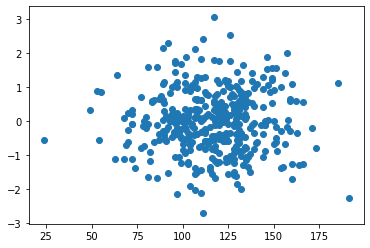

In [16]:
plt.scatter(data['Price'], residuals)

In [19]:
het_goldfeldquandt(y, x, idx = 3) #idx = 3: номер фактора

(0.9252287397742657, 0.7060381103859895, 'increasing')

In [20]:
het_goldfeldquandt?

##### ДИ параметров нормальной регрессии

In [21]:
results.conf_int(alpha=0.05)

,0,1
const,7.113666,8.790762
CompPrice,0.089040,0.103622
Advertising,0.130823,0.158088
Price,-0.099829,-0.090377
Age,-0.051038,-0.039806


In [23]:
conf_intervals = results.conf_int(alpha=0.05)
type(conf_intervals)

pandas.core.frame.DataFrame

In [24]:
conf_intervals[1][2]

0.15808785457948887

#### ДИ для отклика

In [25]:
new_data = np.array([1, 120, 10, 100, 50])
pred_results = results.get_prediction(new_data)
#pred_results.predicted_mean = y_hat_new
pred_results.conf_int()

array([[9.05329203, 9.29690566]])

##### Проверка значимости признаков

p-value

In [26]:
results.pvalues

const           4.174629e-56
CompPrice       1.759956e-87
Advertising     1.436066e-65
Price          1.789416e-139
Age             2.363796e-44
dtype: float64

Значения статистик соответствующих t-тестов

In [27]:
results.tvalues

const          18.644075
CompPrice      25.976423
Advertising    20.832468
Price         -39.561987
Age           -15.899860
dtype: float64

##### Критерий значимости регрессии (работает только в модели с константой)

p-value

In [28]:
results.f_pvalue

9.032118364130386e-157

Значение статистики f-теста

In [29]:
results.fvalue

526.2680008457787

#### Краткая выжимка из results

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     526.3
Date:                Wed, 28 Apr 2021   Prob (F-statistic):          9.03e-157
Time:                        11:13:44   Log-Likelihood:                -531.03
No. Observations:                 400   AIC:                             1072.
Df Residuals:                     395   BIC:                             1092.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.9522      0.427     18.644      0.000       7.114       8.791
CompPrice       0.0963      0.004     25.976      0.000       0.089       0.104
Advertising     0.1445      0.007     20.832      0.000       0.131       0.158
Price          -0.0951      0.002    -39.562      0.000      -0.100      -0.090
Age            -0.0454      0.003    -15.900      0.000      -0.051      -0.040
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.888
Skew:                           0.115   Prob(JB):                        0.641
Kurtosis:                       3.015   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

С мультиколлинеарностью можно бороться с помощью гребневой регрессии